In [71]:
# Import libraries
import pandas as pd                  # for data handling
import numpy as np                   # for numerical operations
import matplotlib.pyplot as plt      # for plotting graphs
from sklearn.model_selection import train_test_split  # for splitting dataset


In [72]:
#Step 2: Load dataset
from google.colab import files   # to upload file in colab
uploaded = files.upload()        # upload  Housing.csv



Saving Housing.csv to Housing (2).csv


In [74]:
# Read dataset
data = pd.read_csv("Housing.csv")
df = data[["area", "price"]]         # keep only 'area' (feature) and 'price' (target)



In [75]:
# Select only "area" as feature (X) and "price" as target (y)
X = data[['area']].values    # take area (house size) column as input feature
y = data[['price']].values   # take price column as output target


In [76]:
# Step 2: Split into training & testing
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  #42 is just a reproducible random seed.
)

In [77]:
# Reshape arrays to 1D (to make mathematical calculations easier)
X_train = X_train.reshape(-1)   # flatten training input
y_train = y_train.reshape(-1)   # flatten training output
X_test  = X_test.reshape(-1)    # flatten test input
y_test  = y_test.reshape(-1)    # flatten test output


In [78]:
#  Step 3: Initialize parameters
m = 0            # initial slope (line gradient)
b = 0            # initial intercept (where line cuts y-axis)
lr = 1e-8  # learning rate (very small, since dataset values are large)
epochs = 500  # number of iterations for training
errors = []      # list to store errors for each epoch

n = len(X_train) # total number of training samples


In [79]:
# Step 4: Gradient Descent Training
for i in range(epochs):   # repeat for given number of epochs
    y_pred = m * X_train + b        # predict prices using current slope and intercept
    error = y_train - y_pred        # calculate error (difference between actual and predicted)
    sse = np.sum(error ** 2)        # calculate Sum of Squared Errors (SSE)
    errors.append(sse)              # store error value for plotting later

    # Calculate gradients (partial derivatives)
    m_grad = -(2/n) * np.sum(X_train * error)   # gradient of error wrt slope
    b_grad = -(2/n) * np.sum(error)             # gradient of error wrt intercept

    # Update slope and intercept using gradient descent rule
    m = m - lr * m_grad   # new slope
    b = b - lr * b_grad   # new intercept


In [80]:
# Step 5: Print final model
print(f"Final slope (m): {m}")      # print learned slope
print(f"Final intercept (b): {b}")  # print learned intercept


Final slope (m): 837.9310402307658
Final intercept (b): 4.014545006763529


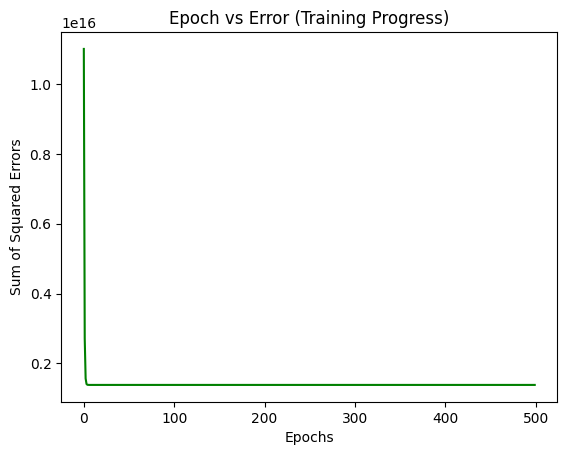

In [81]:
# Step 6: Plot Error vs Epoch
plt.plot(range(epochs), errors, color='green')       # plot epochs on x-axis and errors on y-axis
plt.xlabel("Epochs")                               # label for x-axis
plt.ylabel("Sum of Squared Errors")                # label for y-axis
plt.title("Epoch vs Error (Training Progress)")    # title of the graph
plt.show()                                         # show the graph


In [82]:
# Step 7: Test model accuracy
y_pred_test = m * X_test + b    # predict prices on test data using final model

In [83]:
# Import R² metric to check accuracy
from sklearn.metrics import r2_score
print("R² Score on Test Data:", r2_score(y_test, y_pred_test))  # print R² score


R² Score on Test Data: 0.19515442975852215


**Additional**


In [ ]:
# Import LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model instance
model_sklearn = LinearRegression()

# Train the model using the training data
model_sklearn.fit(X_train.reshape(-1, 1), y_train)

# Predict on the test data
y_pred_sklearn = model_sklearn.predict(X_test.reshape(-1, 1))

# Evaluate the model using R² score
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("R² Score on Test Data (scikit-learn):", r2_sklearn)
print("Slope (scikit-learn):", model_sklearn.coef_[0])
print("Intercept (scikit-learn):", model_sklearn.intercept_)

R² Score on Test Data (scikit-learn): 0.27287851871974644
Slope (scikit-learn): 425.72984193878284
Intercept (scikit-learn): 2512254.2639593435


**Note:** R² is low because house price depends on many factors, not just area. Also, scaling data and tuning learning rate/epochs can improve the fit but still won’t make R² very high with only one feature.
